# DAT340, Assignment 3

### Romain THEODET

In this assignment, we have to implement a political stance classification algorithm for Covid-19 sentences.
See the report for further details.


In [24]:
from typing import Callable
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import unicodedata

# Pandas column
ratingCol = "rating"
messageCol = "message"

# Seed for all random numbers
randomSeed = 0

# Read the data files
dataTrain = pd.read_csv("./a3_train.tsv", names=[ratingCol, messageCol], sep="\t").dropna()
dataTest = pd.read_csv("./a3_test.tsv", names=[ratingCol, messageCol], sep="\t").dropna()


def normalizeString(msg: str) -> str:
    msg = unicodedata.normalize("NFKD", msg)
    msg = msg.encode("ascii", "ignore")
    return msg.decode("utf-8", "ignore")


# Normalize strings
# dataTrain[messageCol] = dataTrain[messageCol].apply(normalizeString)
# dataTest[messageCol] = dataTest[messageCol].apply(normalizeString)

# Shuffle the dataset
dataTrain = dataTrain.sample(frac=1.0, random_state=randomSeed)
dataTest = dataTest.sample(frac=1.0, random_state=randomSeed)


def getTrainData(ratingFunc: Callable[[tuple[int]], int]) -> (pd.Series, pd.Series):
    dataModified = pd.DataFrame()
    dataModified[messageCol] = dataTrain[messageCol]
    dataModified[ratingCol] = dataTrain[ratingCol].apply(lambda elt: ratingFunc(tuple(map(int, elt.split("/")))))
    dataModified = dataModified[dataModified[ratingCol] != -1]
    return dataModified[messageCol], dataModified[ratingCol]


def printAccuracy(msg: str, ratingFunc: Callable[[tuple[int]], int], lowercase: bool, algorithm: str) -> None:
    xTrain, yTrain = getTrainData(ratingFunc)

    if algorithm == "tfidf":
        vectorizer = TfidfVectorizer(
            max_df=0.5,
            min_df=1e-4,
            lowercase=lowercase,
        )
    elif algorithm == "hashing":
        vectorizer = HashingVectorizer(
            lowercase=lowercase,
            n_features=2 ** 18,
        )
    else:
        raise ValueError("Unknown algorithm")

    pipeline = make_pipeline(vectorizer, LinearSVC())
    pipeline.fit(xTrain, yTrain)

    print(msg, ": accuracy: %.2f %%" % (accuracy_score(yTest, pipeline.predict(xTest)) * 100), sep="")


xTest, yTest = dataTest[messageCol], dataTest[ratingCol]


In [25]:
def majorityClassificationNoBad(ratings: tuple[int]) -> int:
    if -1 in ratings:
        return -1

    return round(sum(ratings) / len(ratings))


printAccuracy("Majority classification \t tfidf \t\t no bad values \t\t\t\t", majorityClassificationNoBad, False,
              "tfidf")

printAccuracy("Majority classification \t tfidf \t\t no bad values \t lowercase \t", majorityClassificationNoBad, True,
              "tfidf")

printAccuracy("Majority classification \t hashing \t no bad values \t\t\t\t", majorityClassificationNoBad, False,
              "hashing")
printAccuracy("Majority classification \t hashing \t no bad values \t lowercase \t", majorityClassificationNoBad, True,
              "hashing")


def majorityClassificationWithBad(ratings: tuple[int]) -> int:
    ratings = tuple(filter(lambda r: r != -1, ratings))

    return round(sum(ratings) / len(ratings))


printAccuracy("Majority classification \t tfidf \t\t bad values \t\t\t\t", majorityClassificationWithBad, False,
              "tfidf")
printAccuracy("Majority classification \t tfidf \t\t bad values \t lowercase \t", majorityClassificationWithBad, True,
              "tfidf")

printAccuracy("Majority classification \t hashing \t bad values \t\t\t\t", majorityClassificationWithBad, False,
              "hashing")
printAccuracy("Majority classification \t hashing \t bad values \t lowercase \t", majorityClassificationWithBad, True,
              "hashing")


Majority classification 	 tfidf 		 no bad values 				: accuracy: 86.18 %
Majority classification 	 tfidf 		 no bad values 	 lowercase 	: accuracy: 86.80 %
Majority classification 	 hashing 	 no bad values 				: accuracy: 86.18 %
Majority classification 	 hashing 	 no bad values 	 lowercase 	: accuracy: 86.18 %
Majority classification 	 tfidf 		 bad values 				: accuracy: 86.80 %
Majority classification 	 tfidf 		 bad values 	 lowercase 	: accuracy: 86.62 %
Majority classification 	 hashing 	 bad values 				: accuracy: 86.97 %
Majority classification 	 hashing 	 bad values 	 lowercase 	: accuracy: 87.15 %


In [26]:
def zeroPrioritizedNoBad(ratings: tuple[int]) -> int:
    if -1 in ratings:
        return -1

    if all(ratings):
        # All ratings are 1
        return 1

    return 0


printAccuracy("Zero prioritized \t tfidf \t\t no bad values \t\t\t\t", zeroPrioritizedNoBad, False, "tfidf")
printAccuracy("Zero prioritized \t tfidf \t\t no bad values \t lowercase \t", zeroPrioritizedNoBad, True, "tfidf")

printAccuracy("Zero prioritized \t hashing \t no bad values \t\t\t\t", zeroPrioritizedNoBad, False, "hashing")
printAccuracy("Zero prioritized \t hashing \t no bad values \t lowercase \t", zeroPrioritizedNoBad, True, "hashing")


def zeroPrioritizedWithBad(ratings: tuple[int]) -> int:
    ratings = tuple(filter(lambda r: r != -1, ratings))
    if len(ratings) == 0:
        return -1

    if all(ratings):
        # All ratings are 1
        return 1

    return 0


printAccuracy("Zero prioritized \t tfidf \t\t bad values \t\t\t\t", zeroPrioritizedWithBad, False, "tfidf")
printAccuracy("Zero prioritized \t tfidf \t\t bad values \t lowercase \t", zeroPrioritizedWithBad, True, "tfidf")

printAccuracy("Zero prioritized \t hashing \t bad values \t\t\t\t", zeroPrioritizedWithBad, False, "hashing")
printAccuracy("Zero prioritized \t hashing \t bad values \t lowercase \t", zeroPrioritizedWithBad, True, "hashing")


Zero prioritized 	 tfidf 		 no bad values 				: accuracy: 85.92 %
Zero prioritized 	 tfidf 		 no bad values 	 lowercase 	: accuracy: 86.97 %
Zero prioritized 	 hashing 	 no bad values 				: accuracy: 86.36 %
Zero prioritized 	 hashing 	 no bad values 	 lowercase 	: accuracy: 86.18 %
Zero prioritized 	 tfidf 		 bad values 				: accuracy: 86.88 %
Zero prioritized 	 tfidf 		 bad values 	 lowercase 	: accuracy: 86.71 %
Zero prioritized 	 hashing 	 bad values 				: accuracy: 87.06 %
Zero prioritized 	 hashing 	 bad values 	 lowercase 	: accuracy: 87.24 %


In [27]:
def onePrioritizedNoBad(ratings: tuple[int]) -> int:
    if -1 in ratings:
        return -1

    if not any(ratings):
        # All ratings are 0
        return 0

    return 1


printAccuracy("One prioritized \t tfidf \t\t no bad values \t\t\t\t", onePrioritizedNoBad, False, "tfidf")
printAccuracy("One prioritized \t tfidf \t\t no bad values \t lowercase \t", onePrioritizedNoBad, True, "tfidf")

printAccuracy("One prioritized \t hashing \t no bad values \t\t\t\t", onePrioritizedNoBad, False, "hashing")
printAccuracy("One prioritized \t hashing \t no bad values \t lowercase \t", onePrioritizedNoBad, True, "hashing")


def onePrioritizedWithBad(ratings: tuple[int]) -> int:
    ratings = tuple(filter(lambda r: r != -1, ratings))
    if len(ratings) == 0:
        return -1

    if not any(ratings):
        # All ratings are 0
        return 0

    return 1


printAccuracy("One prioritized \t tfidf \t\t bad values \t\t\t\t", onePrioritizedWithBad, False, "tfidf")
printAccuracy("One prioritized \t tfidf \t\t bad values \t lowercase \t", onePrioritizedWithBad, True, "tfidf")

printAccuracy("One prioritized \t hashing \t bad values \t\t\t\t", onePrioritizedWithBad, False, "hashing")
printAccuracy("One prioritized \t hashing \t bad values \t lowercase \t", onePrioritizedWithBad, True, "hashing")


One prioritized 	 tfidf 		 no bad values 				: accuracy: 86.36 %
One prioritized 	 tfidf 		 no bad values 	 lowercase 	: accuracy: 87.41 %
One prioritized 	 hashing 	 no bad values 				: accuracy: 85.92 %
One prioritized 	 hashing 	 no bad values 	 lowercase 	: accuracy: 86.27 %
One prioritized 	 tfidf 		 bad values 				: accuracy: 86.97 %
One prioritized 	 tfidf 		 bad values 	 lowercase 	: accuracy: 86.71 %
One prioritized 	 hashing 	 bad values 				: accuracy: 86.09 %
One prioritized 	 hashing 	 bad values 	 lowercase 	: accuracy: 85.92 %


In [28]:
import random

random.seed(randomSeed)


def randomClassification(_ratings: tuple[int]) -> int:
    return random.randint(0, 1)


printAccuracy("Random classification", randomClassification, False, "tfidf")


Random classification: accuracy: 49.91 %


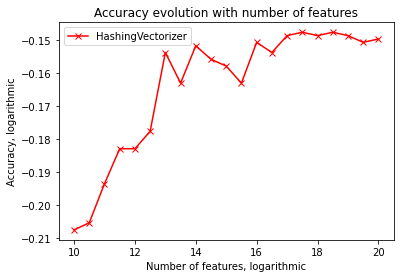

In [29]:
import matplotlib.pyplot as plt
import math

# Calculate different accuracies
accuracies = []
features = [int(2 ** (x / 2)) for x in range(10 * 2, 20 * 2 + 1)]

xTrain, yTrain = getTrainData(majorityClassificationNoBad)

for feat in features:
    pipeline = make_pipeline(HashingVectorizer(
        lowercase=False,
        n_features=feat,
    ), LinearSVC())
    pipeline.fit(xTrain, yTrain)

    accuracy = accuracy_score(yTest, pipeline.predict(xTest))
    accuracies.append(math.log(accuracy))

# Plotting the graph
plt.plot([math.log(f, 2) for f in features], accuracies, c="red", marker="x", label="HashingVectorizer")
plt.xlabel("Number of features, logarithmic")
plt.ylabel("Accuracy, logarithmic")
plt.title("Accuracy evolution with number of features")
plt.legend()
plt.show()


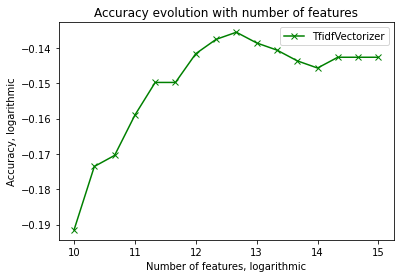

In [30]:
import matplotlib.pyplot as plt
import math

# Calculate different accuracies
accuracies = []
features = [int(2 ** (x / 3)) for x in range(10 * 3, 15 * 3 + 1)]

xTrain, yTrain = getTrainData(onePrioritizedNoBad)

for feat in features:
    pipeline = make_pipeline(TfidfVectorizer(
        lowercase=True,
        max_features=feat,
    ), LinearSVC())
    pipeline.fit(xTrain, yTrain)

    accuracy = accuracy_score(yTest, pipeline.predict(xTest))
    accuracies.append(math.log(accuracy))

# Plotting the graph
plt.plot([math.log(f, 2) for f in features], accuracies, c="green", marker="x", label="TfidfVectorizer")
plt.xlabel("Number of features, logarithmic")
plt.ylabel("Accuracy, logarithmic")
plt.title("Accuracy evolution with number of features")
plt.legend()
plt.show()


In [31]:
pipeline = make_pipeline(TfidfVectorizer(
    max_df=0.5,
    min_df=1e-4,
    lowercase=True,
), LinearSVC())
pipeline.fit(xTrain, yTrain)

yPred = pipeline.predict(xTest)

df = pd.DataFrame({"comment": [], "predicted": [], "actual": []})

for elt, pred, actual in zip(xTest, yPred, yTest):
    if pred != actual:
        df = df.append({
            "comment": elt,
            "predicted": "Supporting" if pred else "Against",
            "actual": "Supporting" if actual else "Against",
        }, ignore_index=True)

df.head(10)


,comment,predicted,actual
0,and now they want to vaccinate the entire worl...,Supporting,Against
1,"don't take their vaccines, do your own researc...",Supporting,Against
2,the government explains the effectiveness of t...,Against,Supporting
3,Just because vaccines aren’t perfect doesn’t n...,Against,Supporting
4,I'm just happy this vaccine exists. The number...,Against,Supporting
5,There should be more measures or schemes to im...,Supporting,Against
6,When the most evil people on the planet are te...,Supporting,Against
7,There also needs to be urgent outreach to youn...,Against,Supporting
8,no other effective way,Against,Supporting
9,The problem with this vaccine is that it sound...,Supporting,Against


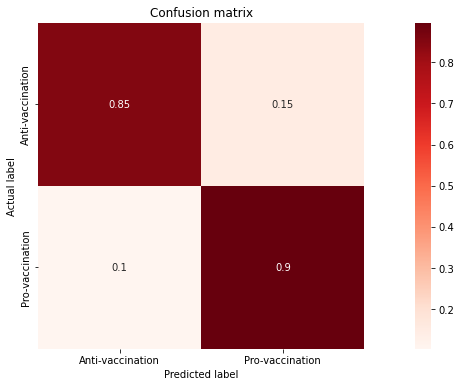

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compare the predicted results to the real ones
accuracy = accuracy_score(yTest, yPred)

# Generate the confusion matrix based on the predictions and the actual results
cm = confusion_matrix(yTest, yPred, normalize="true")

labels = ["Anti-vaccination", "Pro-vaccination"]

plt.figure(figsize=(18, 6))
sns.heatmap(cm, annot=True, square=True, cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion matrix")
plt.show()

In [55]:
import numpy as np

elts = []

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=1e-4,
    lowercase=True,
)
results = vectorizer.fit_transform(xTrain)

counts = pd.DataFrame(results.toarray(), columns=vectorizer.get_feature_names_out()).sum()
counts.sort_values(axis=0, ascending=False, inplace=True)
print(f"The most common words overall are:\n\n{counts.head(20)}")

The most common words are:

to         1147.140513
vaccine    1083.280482
and         973.258309
it          971.866052
of          783.315217
is          771.262133
you         742.268276
my          689.807409
not         679.156459
that        633.555111
dtype: float64


In [105]:
def getFeatures(msg):
    vectorizer = TfidfVectorizer(
        max_df=0.5,
        min_df=1e-4,
        lowercase=True,
    )

    xTrainWithMessage = pd.concat([pd.Series([msg]), xTrain])

    results = vectorizer.fit_transform(xTrainWithMessage)
    features = vectorizer.get_feature_names_out()

    row = np.squeeze(results[0].toarray())

    featuresLimit = 5
    topFeaturesIndices = np.argsort(row)[::-1][:featuresLimit]

    topFeatures = [(features[i], row[i]) for i in topFeaturesIndices]
    df = pd.DataFrame(topFeatures)
    df.columns = ["feature", "tfidf score"]

    print(df)
    print()

getFeatures("I think that the vaccine is a good idea. Vaccine helps people, and has been tested by doctors for years.")
getFeatures("Trump is right, vaccine cause autism. Do not listen to the doctors, you sheep. Jesus is watching you.")


   feature  tfidf score
0    helps     0.394111
1     idea     0.368663
2  doctors     0.316004
3   tested     0.314593
4    years     0.262536

    feature  tfidf score
0  watching     0.334403
1     trump     0.329955
2     jesus     0.323348
3    autism     0.319779
4     sheep     0.319209

